In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Step 1 - load in your data

In [52]:
df= pd.read_csv('results.csv', encoding='latin-1') #https://www.kaggle.com/datasets/irkaal/english-premier-league-results

In [53]:
display(df)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [62]:
df =  df[df.Season == "2021-22"]
df = df[df.FTR == 'H']


## Step 2 - visualise data

Text(0, 0.5, 'Home Team Goals Scored')

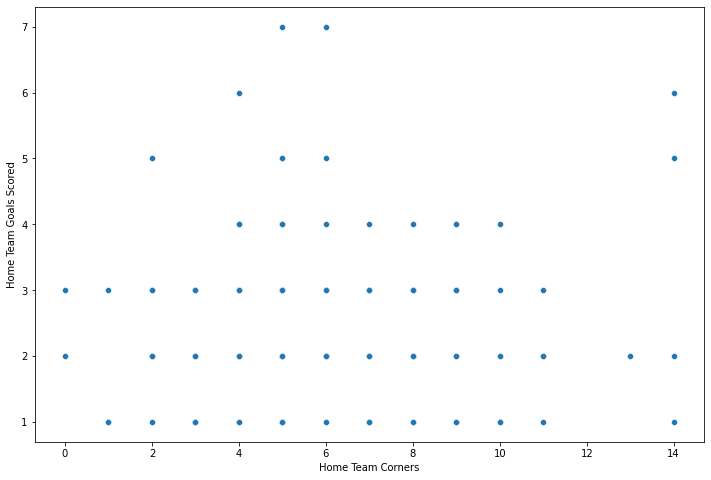

In [63]:
fig, ax = plt.subplots(figsize = (12,8))

sns.scatterplot(data = df, x = "HC", y = 'FTHG')

ax.set_xlabel("Home Team Corners")
ax.set_ylabel("Home Team Goals Scored")



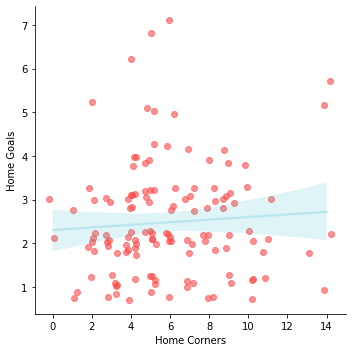

In [69]:
#seaborn has a nice inbuilt function to see a linear regression line of best fit
plot = sns.lmplot(data=df, x = "HC", y = 'FTHG', x_jitter=0.3, y_jitter=0.3, scatter_kws={"color": "#fe4a49", 'alpha': 0.6}, line_kws={"color": "#2ab7ca" , 'alpha': 0.2})
plot.set_axis_labels("Home Corners", "Home Goals")

## Step 3 - build linear regression model (sci-kit learn regression)

In [70]:
lr = LinearRegression()

In [71]:
X = df[['HC']] 
y = df['FTHG']

In [72]:
lr.fit(X, y)

LinearRegression()

## Step 4 - use the linear regression model to make predictions

#### this is c

In [73]:
lr.intercept_ 

2.301503538697368

#### this is m

In [74]:
lr.coef_ 

array([0.02980986])

## Step 5 - assess how good the model is

In [75]:
#R2

lr.score(X, y)


0.005027717843691715

In [76]:
actual = df.FTHG # these are the actual movie popularities in the data set
predicts = lr.predict(X) #these are predicted movie popularities based on the linear regression model we just built

pd.DataFrame({'Actual Values': actual, 'Predicted Values': predicts})

,Actual Values,Predicted Values
10804,2,2.361123
10805,5,2.450553
10807,3,2.450553
10808,3,2.480363
10809,1,2.450553
...,...,...
11103,1,2.331313
11104,1,2.450553
11109,2,2.420743
11110,2,2.390933


In [77]:
#RMSE

from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(predicts,actual))
print(rmse)


1.263033095775444


In [78]:
#mae

from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(predicts,actual)
print(mae)


0.9921634348821979


In [82]:
import statsmodels.api as sm
X = sm.add_constant(X) # adding intercept

In [83]:
model = sm.OLS(y, X, hasconst = True)
res=model.fit()

In [84]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FTHG   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6468
Date:                Wed, 06 Sep 2023   Prob (F-statistic):              0.423
Time:                        00:23:44   Log-Likelihood:                -214.82
No. Observations:                 130   AIC:                             433.6
Df Residuals:                     128   BIC:                             439.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3015      0.245      9.393      0.000       1.817       2.786
HC             0.0298      0.037      0.804      0.423      -0.044       0.103
==============================================================================
Omnibus:                       28.650   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.908
Skew:                           1.122   Prob(JB):                     7.94e-10
Kurtosis:                       4.644   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""